In [2]:
import pandas as pd
import numpy as np 
import matplotlib as plt 

In [3]:
df = pd.read_csv('train_ctrUa4K.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [10]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

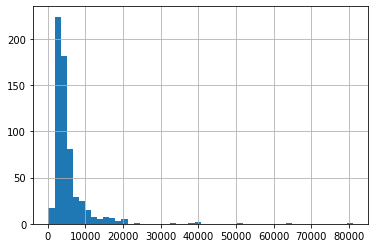

In [11]:
df['ApplicantIncome'].hist(bins=50)

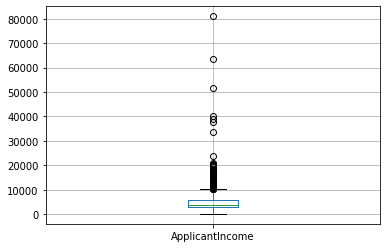

In [12]:
df.boxplot(column='ApplicantIncome')

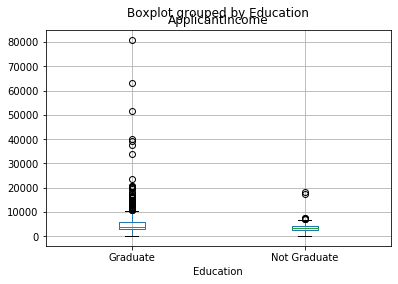

In [13]:
df.boxplot(column='ApplicantIncome', by = 'Education')

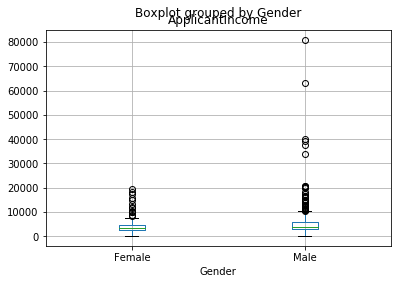

In [14]:
df.boxplot(column='ApplicantIncome', by = 'Gender')

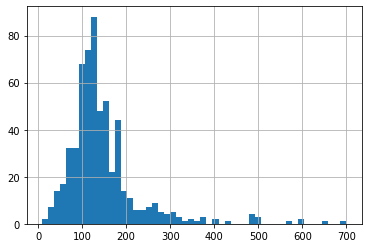

In [15]:
df['LoanAmount'].hist(bins=50)

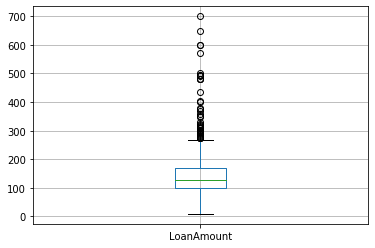

In [16]:
df.boxplot(column='LoanAmount')

In [19]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()) 
print('Frequency Table for Credit History:')
print(temp1)
print('\nProbility of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


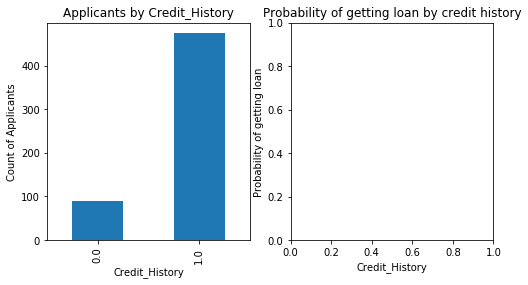

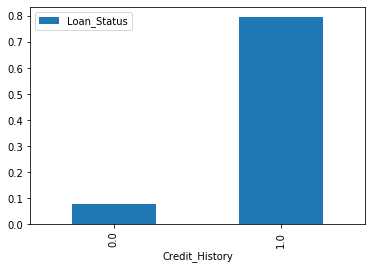

In [27]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,4)) 
ax1 = fig.add_subplot(121) 
ax1.set_xlabel('Credit_History') 
ax1.set_ylabel('Count of Applicants') 
ax1.set_title("Applicants by Credit_History") 
temp1.plot(kind='bar') 
ax2 = fig.add_subplot(122) 
ax2.set_xlabel('Credit_History') 
ax2.set_ylabel('Probability of getting loan') 
ax2.set_title("Probability of getting loan by credit history")
temp2.plot(kind = 'bar') 

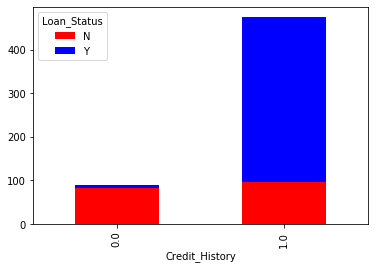

In [28]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status']) 
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

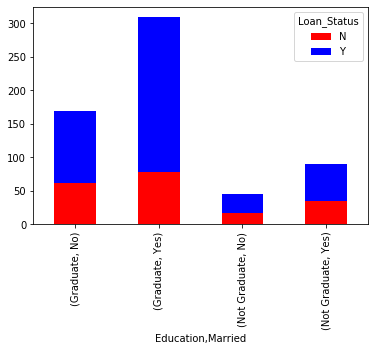

In [36]:
temp3 = pd.crosstab([df['Education'], df['Married']], df['Loan_Status']) 
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

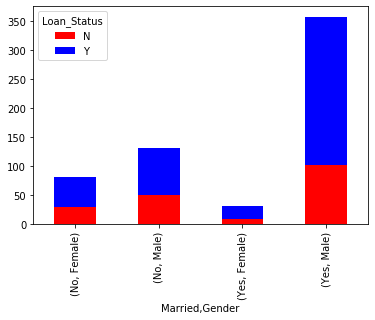

In [35]:
temp3 = pd.crosstab([df['Married'], df['Gender']], df['Loan_Status']) 
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)